# What are the fraction of mutations we included?

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import re

In [4]:
OUT_DIR = "scope_output_kmeans"

In [36]:
def get_counts(STR, OUT_DIR):

    mutation_group_df = pd.read_parquet(f"../data/simulation/ground_truth/{STR}/sim_mutation_group.parquet")
    mutation_count = len(mutation_group_df)

    file_path = f"../data/simulation/{OUT_DIR}/{STR}/summary.txt"

    with open(file_path, "r") as f:
        content = f.read()

        match = re.search(r"#UNIQUE SOLUTIONS:\s*(\d+)\s*WITH VALUE\s*([\d\.]+)\s+", content)

        if match:
            num_solutions = int(match.group(1))
            num_mutations_taken = int(float(match.group(2)))
        else:
            raise ValueError("Match File Not Found")

    return mutation_count, num_mutations_taken, num_mutations_taken / mutation_count

In [37]:
def make_results_df(fn):
    # parameters
    ncells = [1000, 5000, 10000]
    n_mutation_groups = [5, 10, 15]
    mutation_group_sizes = [100, 500, 1000]
    nclusters = [5, 10, 15]
    coverages = [0.02, 0.05, 0.1]
    seeds = np.arange(5)

    ncells_list = []
    n_mutation_groups_list = []
    mutation_group_sizes_list = []
    n_clusters_list = []
    coverages_list = []
    seeds_list = []
    value_a_list = []
    value_b_list = []
    value_c_list = []
    failures_list = []

    for ncell in ncells:
        for n_mutation_group in n_mutation_groups:
            for mutation_group_size in mutation_group_sizes:
                for coverage in coverages:
                    for ncluster in nclusters:
                        for seed in seeds:
                            ncells_list.append(ncell)
                            n_mutation_groups_list.append(n_mutation_group)
                            mutation_group_sizes_list.append(mutation_group_size)
                            coverages_list.append(coverage)
                            n_clusters_list.append(ncluster)
                            seeds_list.append(seed)
                            try:
                                SIMULATION_STR = f'n{ncell}_m{n_mutation_group}_size{mutation_group_size}_cov{str(coverage)}_p{ncluster}_s{seed}'
                                a, b, c = fn(SIMULATION_STR)
                                value_a_list.append(a)
                                value_b_list.append(b)
                                value_c_list.append(c)
                                failures_list.append(None)
                            except Exception as e:
                                value_a_list.append(None)
                                value_b_list.append(None)
                                value_c_list.append(None)
                                failures_list.append(e)

    results_df = pd.DataFrame({
        'ncells': ncells_list,
        'n_mutation_groups': n_mutation_groups_list,
        'mutation_group_size': mutation_group_sizes_list,
        'coverage': coverages_list,
        'n_clusters': n_clusters_list,
        'seed': seeds_list,
        'A': value_a_list,
        'B': value_b_list,
        'C': value_c_list,
        'error': failures_list,
    })

    return results_df
    

In [38]:
df1 = make_results_df(lambda STR: get_counts(STR, "scope_output"))
df2 = make_results_df(lambda STR: get_counts(STR, "scope_output_kmeans_known_k"))
df3 = make_results_df(lambda STR: get_counts(STR, "scope_output_kmeans"))

df1

,ncells,n_mutation_groups,mutation_group_size,coverage,n_clusters,seed,A,B,C,error
0,1000,5,100,0.02,5,0,461,461,1.0,None
1,1000,5,100,0.02,5,1,524,524,1.0,None
2,1000,5,100,0.02,5,2,512,512,1.0,None
3,1000,5,100,0.02,5,3,514,514,1.0,None
4,1000,5,100,0.02,5,4,523,523,1.0,None
...,...,...,...,...,...,...,...,...,...,...
1210,10000,15,1000,0.10,15,0,15070,15070,1.0,None
1211,10000,15,1000,0.10,15,1,14950,14950,1.0,None
1212,10000,15,1000,0.10,15,2,15255,15255,1.0,None
1213,10000,15,1000,0.10,15,3,14878,14878,1.0,None


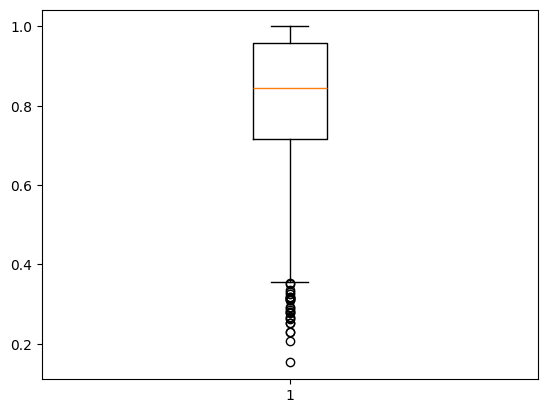

In [30]:
plt.boxplot(df[~df['C'].isna()]['C'].to_numpy())
plt.show()

In [31]:
STR = "n10000_m15_size1000_cov0.05_p5_s2"

def get_counts_phertilizer(STR):

    mutation_group_df = pd.read_parquet(f"../data/simulation/ground_truth/{STR}/sim_mutation_group.parquet")
    mutation_count = len(mutation_group_df)

    file_path = f"../data/simulation/{OUT_DIR}/{STR}/summary.txt"

    snv_cluster_df = pd.read_csv(f"../data/simulation/phertilizer_output/{STR}/snv_clusters.csv")

    num_mutations_taken = len(snv_cluster_df)

    return mutation_count, num_mutations_taken, num_mutations_taken / mutation_count

get_counts(STR)

(15065, 11625, 0.7716561566544972)

In [39]:
dfp = make_results_df(get_counts_phertilizer)
dfp

,ncells,n_mutation_groups,mutation_group_size,coverage,n_clusters,seed,A,B,C,error
0,1000,5,100,0.02,5,0,461.0,425.0,0.921909,None
1,1000,5,100,0.02,5,1,524.0,524.0,1.000000,None
2,1000,5,100,0.02,5,2,512.0,468.0,0.914062,None
3,1000,5,100,0.02,5,3,514.0,422.0,0.821012,None
4,1000,5,100,0.02,5,4,523.0,491.0,0.938815,None
...,...,...,...,...,...,...,...,...,...,...
1210,10000,15,1000,0.10,15,0,15070.0,14945.0,0.991705,None
1211,10000,15,1000,0.10,15,1,NaN,NaN,NaN,[Errno 2] No such file or directory: '../data/...
1212,10000,15,1000,0.10,15,2,15255.0,13996.0,0.917470,None
1213,10000,15,1000,0.10,15,3,14878.0,14328.0,0.963033,None


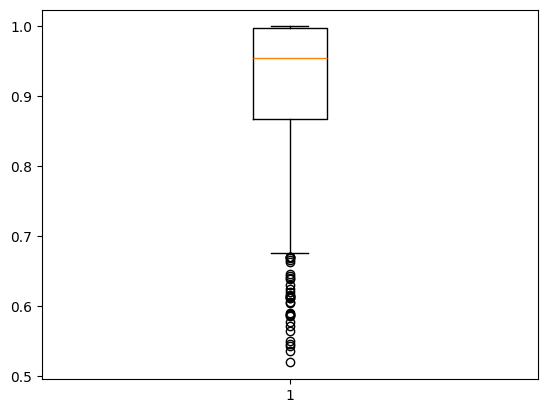

In [33]:
plt.boxplot(df2[~df2['C'].isna()]['C'].to_numpy())
plt.show()

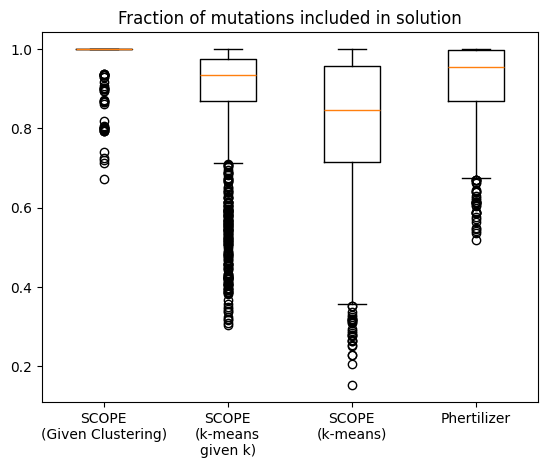

In [42]:
plt.boxplot(
    [
    df1[~df1['C'].isna()]['C'].to_numpy(), 
    df2[~df2['C'].isna()]['C'].to_numpy(),
    df3[~df3['C'].isna()]['C'].to_numpy(), 
    dfp[~dfp['C'].isna()]['C'].to_numpy()
    ],
    tick_labels=['SCOPE\n(Given Clustering)', 'SCOPE\n(k-means\ngiven k)', 'SCOPE\n(k-means)', 'Phertilizer'])
plt.title("Fraction of mutations included in solution")
plt.show()

# Let's see an instance

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import os


In [132]:
def post(STR):

    OUT_DIR = "scope_output_kmeans_known_k"
    INP_DIR = "scope_input_kmeans_known_k"

    F_bar = pd.read_csv(f"../data/simulation/{INP_DIR}/{STR}/F_bar.csv", index_col=0)
    kmeans_clones = pd.read_csv(f"../data/simulation/{INP_DIR}/{STR}/kmeans_clones.csv", index_col=0)

    X = pd.read_csv(f"../data/simulation/{OUT_DIR}/{STR}/solution_0/X.csv", index_col=0)
    mutation_groups_selected = X[X['0'] > 0.5].index.tolist()
    mutation_groups_not_selected = X[X['0'] < 0.5].index.tolist()

    input_prefix = f"../data/simulation/ground_truth/{STR}/sim"

    df_total = pd.read_parquet(f"{input_prefix}_read_count.parquet")
    df_variant = pd.read_parquet(f"{input_prefix}_variant_count.parquet")
    df = pd.read_parquet(f"{input_prefix}_character_matrix_without_noise.parquet")
    df_copy_number = pd.read_parquet(f"{input_prefix}_copy_numbers.parquet")

    df_cluster = df[['cluster_id']]

    df_total = df_total.join(df_cluster, how='left')
    df_variant = df_variant.join(df_cluster, how='left')
    df_copy_number = df_copy_number.join(df_cluster, how='left')

    total_table = df_total.groupby('cluster_id').sum(numeric_only=True)
    alt_table = df_variant.groupby('cluster_id').sum(numeric_only=True)
    df_cn = df_copy_number.groupby('cluster_id').mean().astype(int)

    vaf = alt_table.div(total_table).replace(np.nan, 0)
    F = (vaf * df_cn).clip(upper=1)

    kmeans_clones_X = pd.merge(kmeans_clones, X, left_on="mutation_group", right_index=True, how="left")

    mutations_not_taken = kmeans_clones_X[kmeans_clones_X['0'] < 0.5]

    F_not = F.loc[:, mutations_not_taken['mutation']]

    F_bar_t = F_bar.iloc[:, mutation_groups_selected]

    df1 = F_not
    df2 = F_bar_t

    df1_values = df1.values.T  # shape: (num_cols_df1, num_rows)
    df2_values = df2.values.T  # shape: (num_cols_df2, num_rows)

    # compute pairwise euclidean distances between all columns
    dist_matrix = cdist(df1_values, df2_values, metric='euclidean')

    # make it a DataFrame
    dist_df = pd.DataFrame(
        dist_matrix,
        index=df1.columns,   # columns of first df
        columns=df2.columns  # columns of second df
    )

    min_col_per_row = dist_df.idxmin(axis=1)
    min_col_df = min_col_per_row.rename('min_column').reset_index()
    min_col_df['mutation'] = min_col_df['index'].str[1:].astype(int)

    mutation_group_update = pd.merge(kmeans_clones_X, min_col_df[['index', 'min_column']], left_on='mutation', right_on='index', how='left')
    mutation_group_update['mutation_group'] = mutation_group_update['min_column'].combine_first(
        mutation_group_update['mutation_group']
    )

    mutation_group_update['mutation_group'] = mutation_group_update['mutation_group'].astype(str).str.strip().astype(int)

    mutation_group_update = mutation_group_update[['mutation', 'mutation_group']]
    os.makedirs(f"../data/simulation/scope_post_kmeans_known_k/{STR}", exist_ok=True)
    mutation_group_update.to_csv(f"../data/simulation/scope_post_kmeans_known_k/{STR}/kmeans_cleaned_clones.csv")


In [133]:
make_results_df(post)

: 

# Correcting for Laks et. al.

In [7]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import os

In [8]:
F_bar = pd.read_csv(f"../data/laks/scope/F_bar.csv", index_col=0)
kmeans_clones = pd.read_csv(f"../data/laks/scope/kmeans_labels.csv", index_col=0)

X = pd.read_csv(f"../data/laks/scope/kmeans_065_include_3_5_7/solution_9/X.csv", index_col=0)
mutation_groups_selected = X[X['0'] > 0.5].index.tolist()
mutation_groups_not_selected = X[X['0'] < 0.5].index.tolist()

mutation_groups_selected

[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11]

In [9]:
F = pd.read_csv("../data/laks/scope/F.csv", index_col=0)
F

,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0.0,0.0,1.0,0.000000,0.833333,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.434783,1.000000,0.000000,0.0,1.000000,0.0,0.000000
B,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.800000,1.000000,0.000000,0.0,1.000000,0.0,0.000000
C,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.066667,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.000000,0.0,0.000000
D,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,0.555556,0.000000,1.0,1.000000,0.0,0.000000
E,1.0,1.0,1.0,0.784314,0.000000,1.000000,0.625000,0.625,0.606061,1.0,...,0.0,0.769231,0.095238,0.000000,0.666667,0.000000,0.0,0.952381,1.0,0.000000
F,1.0,1.0,1.0,1.000000,0.000000,0.190476,1.000000,1.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.0,0.000000
G,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.842105,0.0,1.000000,0.0,0.909091
H,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.173913,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.909091,0.0,1.000000,0.0,1.000000
I,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,0.869565,0.250000,0.0,1.000000,0.0,1.000000


In [11]:
kmeans_clones_X = pd.merge(kmeans_clones, X, left_on="clone", right_index=True, how="left")

mutations_not_taken = kmeans_clones_X[kmeans_clones_X['0'] < 0.5]

F_not = F.loc[:, mutations_not_taken['mutation']]

F_bar_t = F_bar.iloc[:, mutation_groups_selected]

df1 = F_not
df2 = F_bar_t

df1_values = df1.values.T  # shape: (num_cols_df1, num_rows)
df2_values = df2.values.T  # shape: (num_cols_df2, num_rows)

# compute pairwise euclidean distances between all columns
dist_matrix = cdist(df1_values, df2_values, metric='euclidean')

# make it a DataFrame
dist_df = pd.DataFrame(
    dist_matrix,
    index=df1.columns,   # columns of first df
    columns=df2.columns  # columns of second df
)

dist_df

,0,1,2,3,4,5,6,7,9,10,11
10:11106100:T:C,2.019021,2.138533,1.125951,2.316370,2.346926,2.386929,1.745568,2.376869,2.123096,2.573718,1.247953
10:11221315:G:T,2.216341,2.209690,0.884016,2.346543,2.433666,2.481200,1.970465,2.489883,2.233033,2.677755,1.372506
10:11366225:A:C,2.176869,2.170098,0.588397,2.263648,2.397775,2.440148,1.925960,2.413278,2.193862,2.533418,1.307809
10:11554681:T:G,2.284945,2.291762,0.976367,2.340710,2.502852,2.423211,2.051311,2.591359,2.304549,2.773023,1.530997
10:11688080:G:A,2.099763,2.092741,1.045927,2.392641,2.327996,2.354390,1.838360,2.544479,2.117374,2.637533,1.174993
...,...,...,...,...,...,...,...,...,...,...,...
X:66661916:G:T,2.075764,2.147718,0.672383,2.103215,2.363477,2.208914,1.948814,2.406282,2.146871,2.494667,1.456537
X:6995229:G:C,1.962582,2.024186,0.743759,2.078067,2.174298,2.218727,1.781990,2.232035,2.045807,2.362008,1.274259
X:81020431:C:T,2.085525,2.251661,0.648522,2.117093,2.441307,2.360441,1.822081,2.277970,2.220847,2.425732,1.430673
X:82405873:C:T,2.651308,2.236068,1.341428,2.161444,2.457641,2.261131,2.449490,2.569533,2.259138,2.752638,2.000260


In [13]:
min_col_per_row = dist_df.idxmin(axis=1)
min_col_df = min_col_per_row.rename('min_column').reset_index()
min_col_df['mutation'] = min_col_df['index']
min_col_df

,index,min_column,mutation
0,10:11106100:T:C,2,10:11106100:T:C
1,10:11221315:G:T,2,10:11221315:G:T
2,10:11366225:A:C,2,10:11366225:A:C
3,10:11554681:T:G,2,10:11554681:T:G
4,10:11688080:G:A,2,10:11688080:G:A
...,...,...,...
1121,X:66661916:G:T,2,X:66661916:G:T
1122,X:6995229:G:C,2,X:6995229:G:C
1123,X:81020431:C:T,2,X:81020431:C:T
1124,X:82405873:C:T,2,X:82405873:C:T


In [15]:
min_col_df['min_column'].value_counts()

min_column
2     1024
11      59
6       38
3        3
1        1
9        1
Name: count, dtype: int64

In [18]:
# import pandas as pd
# import numpy as np

# # df_dist is your distance DataFrame
# dist_values = dist_df.values  # convert to numpy array

# # Compute row-wise confidences
# conf_values = np.exp(-dist_values) / np.exp(-dist_values).sum(axis=1, keepdims=True)

# # Convert back to DataFrame
# df_conf = pd.DataFrame(conf_values, index=dist_df.index, columns=dist_df.columns)
# print(df_conf.head())

In [27]:
kmeans_clones_X

,mutation,clone,0
0,10:100129846:C:A,1,1.0
1,10:100185101:A:G,1,1.0
2,10:100209326:T:C,2,1.0
3,10:100283942:C:T,9,1.0
4,10:10086005:G:T,7,1.0
...,...,...,...
14063,X:98278474:C:A,0,1.0
14064,X:98452192:T:C,5,1.0
14065,X:98700894:C:T,2,1.0
14066,X:99136386:C:T,1,1.0


In [26]:
min_col_df

,index,min_column,mutation
0,10:11106100:T:C,2,10:11106100:T:C
1,10:11221315:G:T,2,10:11221315:G:T
2,10:11366225:A:C,2,10:11366225:A:C
3,10:11554681:T:G,2,10:11554681:T:G
4,10:11688080:G:A,2,10:11688080:G:A
...,...,...,...
1121,X:66661916:G:T,2,X:66661916:G:T
1122,X:6995229:G:C,2,X:6995229:G:C
1123,X:81020431:C:T,2,X:81020431:C:T
1124,X:82405873:C:T,2,X:82405873:C:T


In [31]:
mutation_group_update = pd.merge(kmeans_clones_X, min_col_df[['index', 'min_column']], left_on='mutation', right_on='index', how='left')
mutation_group_update['clone'] = mutation_group_update['min_column'].combine_first(
    mutation_group_update['clone']
)

mutation_group_update['clone'] = mutation_group_update['clone'].astype(str).str.strip().astype(int)


mutation_group_update

,mutation,clone,0,index,min_column
0,10:100129846:C:A,1,1.0,NaN,NaN
1,10:100185101:A:G,1,1.0,NaN,NaN
2,10:100209326:T:C,2,1.0,NaN,NaN
3,10:100283942:C:T,9,1.0,NaN,NaN
4,10:10086005:G:T,7,1.0,NaN,NaN
...,...,...,...,...,...
14063,X:98278474:C:A,0,1.0,NaN,NaN
14064,X:98452192:T:C,5,1.0,NaN,NaN
14065,X:98700894:C:T,2,1.0,NaN,NaN
14066,X:99136386:C:T,1,1.0,NaN,NaN


In [32]:
mutation_group_update['clone'].value_counts()

clone
6     3171
2     2812
1     2407
4     1400
3     1189
9      954
7      685
5      640
0      310
11     252
10     248
Name: count, dtype: int64

In [33]:
mutation_group_update = mutation_group_update[['mutation', 'clone']]
mutation_group_update.to_csv(f"../data/laks/scope/kmeans_cleaned_clones.csv")

In [ ]:







''%%!


